Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'signal', 'fs'])
Shape of signal: (2, 25000)


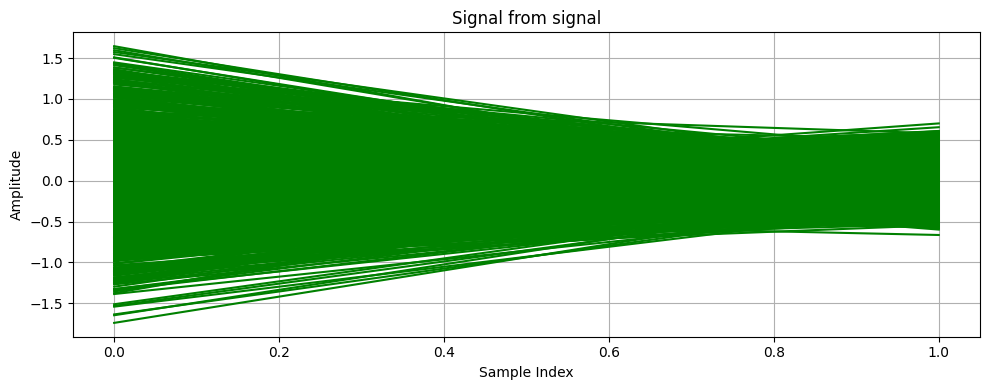

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Path to your .mat file
mat_file_path = r'E:\Collaboration Work\With Faisal\Bearings\Dataset\Bearing Dataset2\Inner (1800)\2019-11-03 17-13-07.mat'

# Load the .mat file
data = scipy.io.loadmat(mat_file_path)

# Print keys to understand structure
print("Keys in .mat file:", data.keys())

# Access the variable that contains the signal (modify if needed)
# You may need to explore the keys
# Example: if the signal is stored in 'channel_1'
# signal = data['channel_1'].squeeze()

# Just get the first non-meta key (ignoring __header__, __version__, __globals__)
signal_key = [key for key in data.keys() if not key.startswith('__')][0]
signal = data[signal_key].squeeze()
print("Shape of signal:", signal.shape)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(signal, color='green')
plt.title(f'Signal from {signal_key}')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


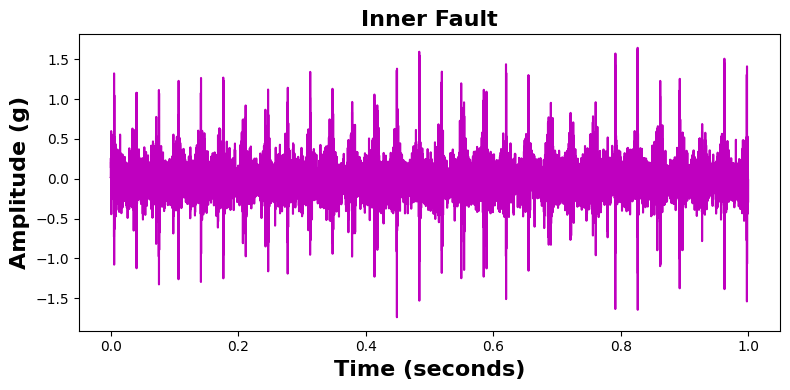

In [14]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# File path
mat_file_path = r'E:\Collaboration Work\With Faisal\Bearings\Dataset\Bearing Dataset2\Inner (1800)\2019-11-03 17-13-07.mat'

# Load the .mat file
data = scipy.io.loadmat(mat_file_path)

# Extract signal and sampling frequency
signal = data['signal']      # shape: (2, 25000)
fs = data['fs'].item()       # sampling frequency (scalar)

# Time axis for Channel 1
t = np.arange(signal.shape[1]) / fs

# Plot Channel 1
plt.figure(figsize=(8, 4))
plt.plot(t, signal[0], color='m')
plt.title('Inner Fault', fontsize=16, fontweight='bold')
plt.xlabel('Time (seconds)', fontsize=16, fontweight='bold')
plt.ylabel('Amplitude (g)', fontsize=16, fontweight='bold')
#plt.grid(True)
plt.tight_layout()
plt.show()


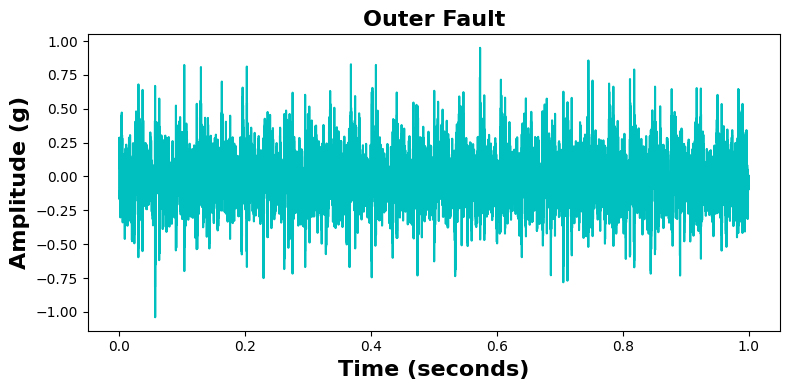

In [16]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# File path
mat_file_path = r'E:\Collaboration Work\With Faisal\Bearings\Dataset\Bearing Dataset2\Outer (1800)\2019-11-03 20-54-02.mat'

# Load the .mat file
data = scipy.io.loadmat(mat_file_path)

# Extract signal and sampling frequency
signal = data['signal']      # shape: (2, 25000)
fs = data['fs'].item()       # sampling frequency (scalar)

# Time axis for Channel 1
t = np.arange(signal.shape[1]) / fs

# Plot Channel 1
plt.figure(figsize=(8, 4))
plt.plot(t, signal[0], color='c')
plt.title('Outer Fault', fontsize=16, fontweight='bold')
plt.xlabel('Time (seconds)', fontsize=16, fontweight='bold')
plt.ylabel('Amplitude (g)', fontsize=16, fontweight='bold')
#plt.grid(True)
plt.tight_layout()
plt.show()


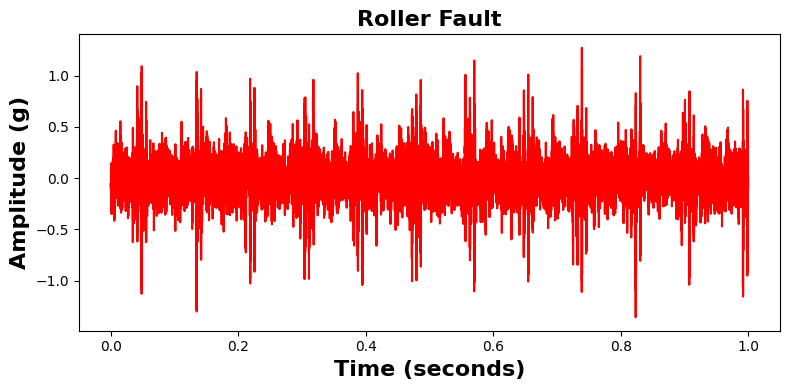

In [18]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# File path
mat_file_path = r'E:\Collaboration Work\With Faisal\Bearings\Dataset\Bearing Dataset2\Roller (1800)\2019-11-03 18-10-54.mat'

# Load the .mat file
data = scipy.io.loadmat(mat_file_path)

# Extract signal and sampling frequency
signal = data['signal']      # shape: (2, 25000)
fs = data['fs'].item()       # sampling frequency (scalar)

# Time axis for Channel 1
t = np.arange(signal.shape[1]) / fs

# Plot Channel 1
plt.figure(figsize=(8, 4))
plt.plot(t, signal[0], color='r')
plt.title('Roller Fault', fontsize=16, fontweight='bold')
plt.xlabel('Time (seconds)', fontsize=16, fontweight='bold')
plt.ylabel('Amplitude (g)', fontsize=16, fontweight='bold')
#plt.grid(True)
plt.tight_layout()
plt.show()


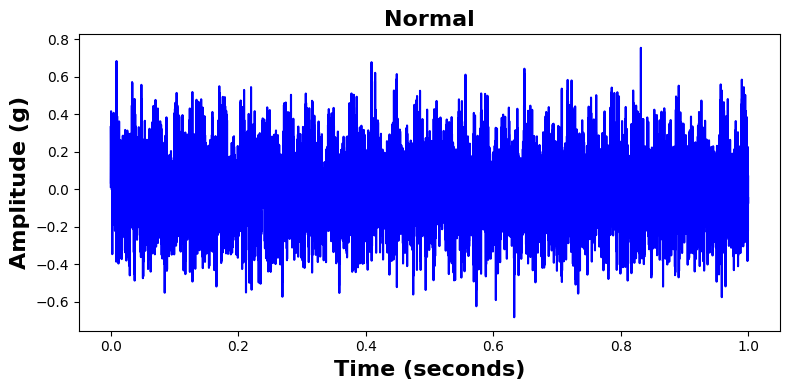

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# File path
mat_file_path = r'E:\Collaboration Work\With Faisal\Bearings\Dataset\Bearing Dataset2\Normal (1800)\2019-11-03 18-41-08.mat'

# Load the .mat file
data = scipy.io.loadmat(mat_file_path)

# Extract signal and sampling frequency
signal = data['signal']      # shape: (2, 25000)
fs = data['fs'].item()       # sampling frequency (scalar)

# Time axis for Channel 1
t = np.arange(signal.shape[1]) / fs

# Plot Channel 1
plt.figure(figsize=(8, 4))
plt.plot(t, signal[0], color='b')
plt.title('Normal', fontsize=16, fontweight='bold')
plt.xlabel('Time (seconds)', fontsize=16, fontweight='bold')
plt.ylabel('Amplitude (g)', fontsize=16, fontweight='bold')
#plt.grid(True)
plt.tight_layout()
plt.show()


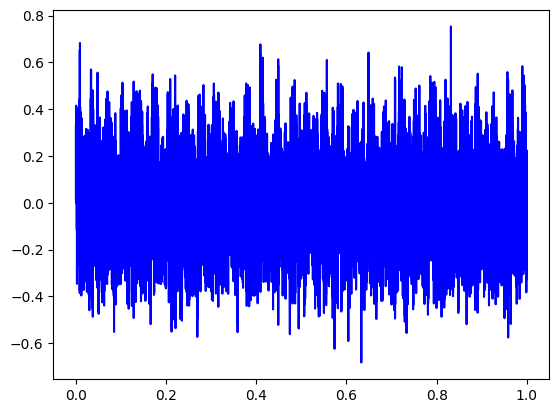

In [3]:
plt.plot(t, signal[0], color='b')



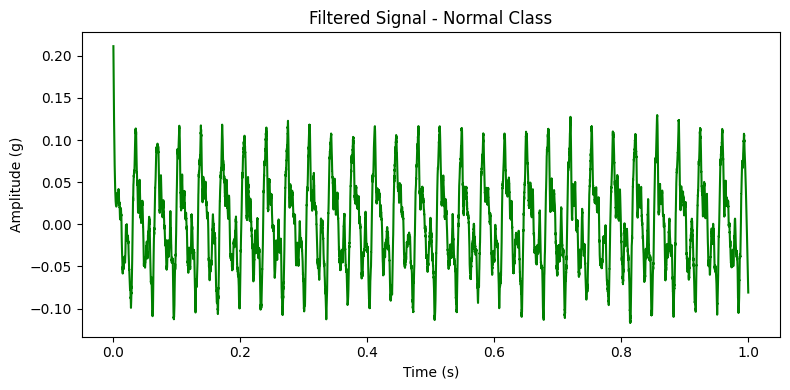

In [4]:
from scipy.signal import savgol_filter

filtered_signal = savgol_filter(signal[0], window_length=301, polyorder=3)

plt.figure(figsize=(8, 4))
plt.plot(t, filtered_signal, color='g')
plt.title('Filtered Signal - Normal Class')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.tight_layout()
plt.show()


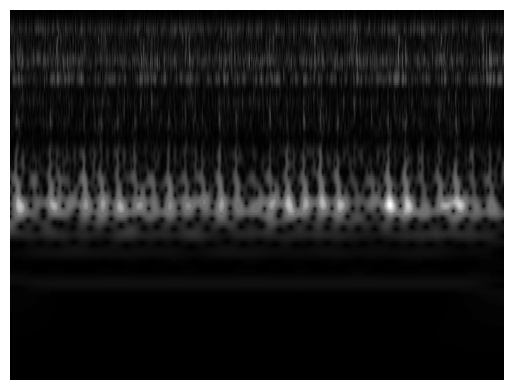

In [ ]:
import cv2
import matplotlib.pyplot as plt

# === Load original CWT scalogram image ===
img_path = r"E:\Collaboration Work\With Farooq\Bearings MDPI\CWT_Log\For Channel-02\Roller (1800)\CWT_Log_Image_Channel2_40.png"
color_img = cv2.imread(img_path)

# Convert BGR (OpenCV default) to RGB for display
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# === Convert to grayscale ===
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# === Plot both versions ===
plt.figure(figsize=(10, 4))

plt.imshow(gray_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()




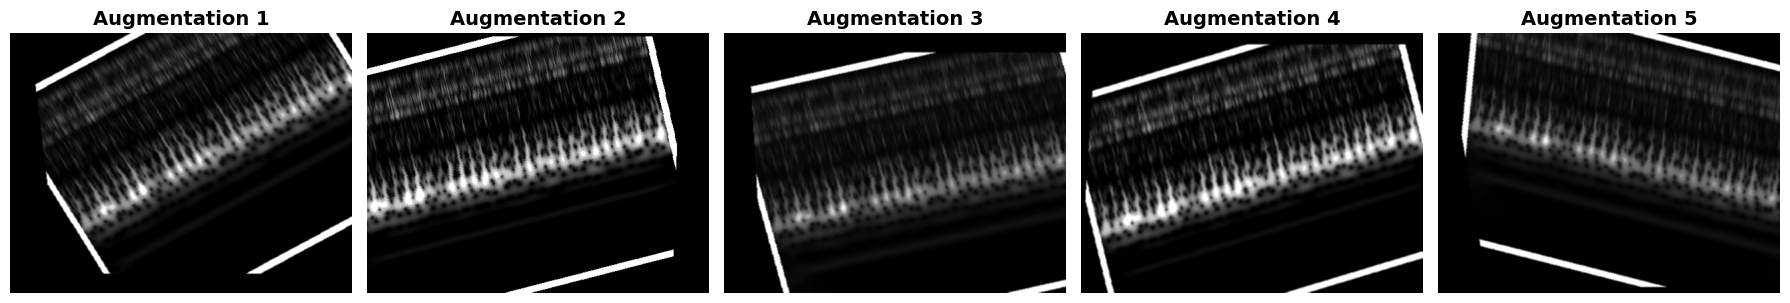

In [14]:
import cv2
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch

# === Load grayscale image ===
img_path = r"E:\Collaboration Work\With Farooq\Bearings MDPI\Diagrams\grayscale_.png"
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
pil_img = Image.fromarray(gray_img)

# === Define augmentations ===
transform = T.Compose([
    T.RandomHorizontalFlip(p=1.0),
    T.RandomRotation(degrees=30),
    T.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=10),
    T.ColorJitter(brightness=0.5, contrast=0.5),
    T.GaussianBlur(kernel_size=3),
])

# === Apply and visualize augmentations ===
plt.figure(figsize=(18, 5))
for i in range(5):
    aug_img = transform(pil_img)
    plt.subplot(1, 5, i + 1)
    plt.imshow(aug_img, cmap='gray')
    plt.title(f'Augmentation {i+1}', fontsize=14, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()


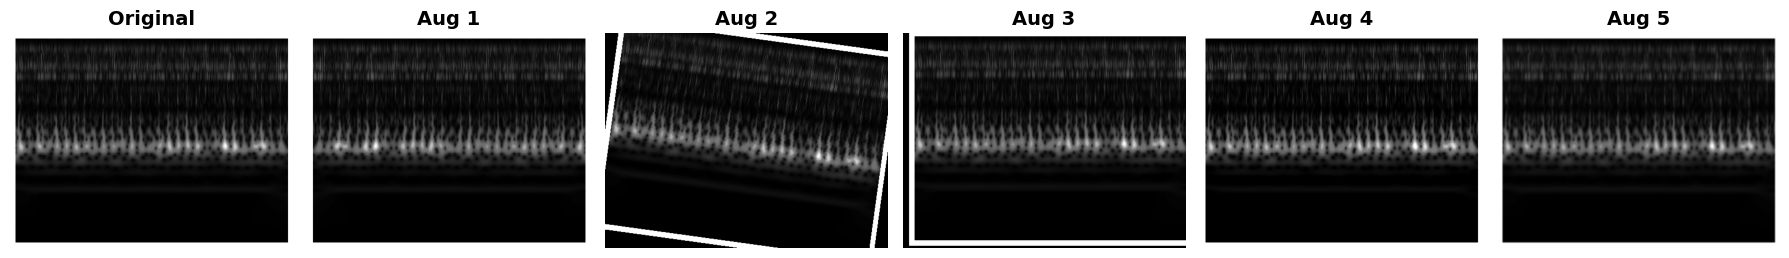

In [15]:
import cv2
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

# Load grayscale image
img_path = r"E:\Collaboration Work\With Farooq\Bearings MDPI\Diagrams\grayscale_.png"
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
pil_img = Image.fromarray(gray_img)

# Define clearer and controlled augmentations
augmentations = [
    T.RandomHorizontalFlip(p=1.0),
    T.RandomRotation(degrees=10),
    T.RandomAffine(degrees=0, translate=(0.05, 0.05)),
    T.ColorJitter(brightness=0.3, contrast=0.3),
    T.GaussianBlur(kernel_size=(3, 3))
]

# Plot original + augmentations
plt.figure(figsize=(18, 5))

# Original image
plt.subplot(1, 6, 1)
plt.imshow(pil_img, cmap='gray')
plt.title("Original", fontsize=14, fontweight='bold')
plt.axis('off')

# Augmented images
for i, aug in enumerate(augmentations):
    aug_img = aug(pil_img)
    plt.subplot(1, 6, i + 2)
    plt.imshow(aug_img, cmap='gray')
    plt.title(f"Aug {i+1}", fontsize=14, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()


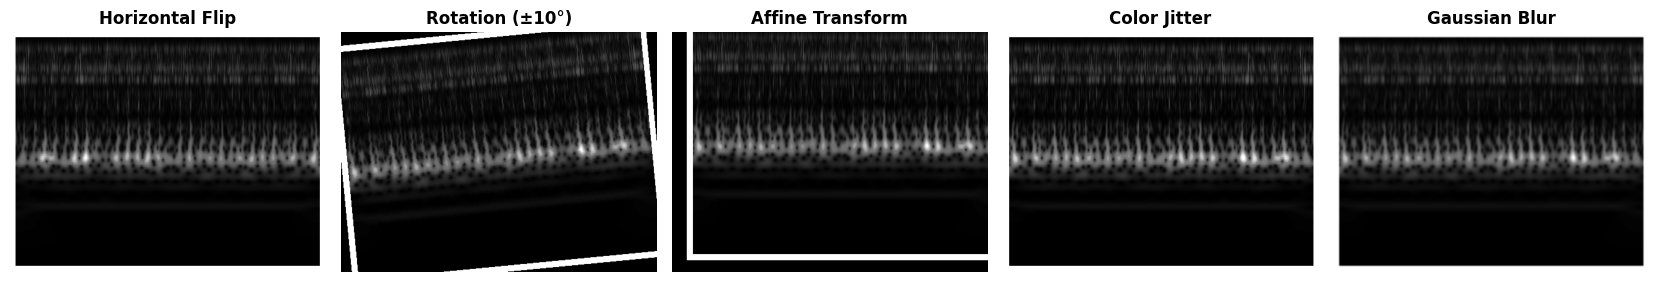

In [21]:
import cv2
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

# === Load grayscale image ===
img_path = r"E:\Collaboration Work\With Farooq\Bearings MDPI\Diagrams\grayscale_.png"
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
pil_img = Image.fromarray(gray_img)

# === Define controlled augmentations ===
augmentations = [
    ("Horizontal Flip", T.RandomHorizontalFlip(p=1.0)),
    ("Rotation (±10°)", T.RandomRotation(degrees=10)),
    ("Affine Transform", T.RandomAffine(degrees=0, translate=(0.05, 0.05))),
    ("Color Jitter", T.ColorJitter(brightness=0.3, contrast=0.3)),
    ("Gaussian Blur", T.GaussianBlur(kernel_size=(3, 3)))
]

# === Plot original and augmented images ===
plt.figure(figsize=(20, 5))



# Augmented images
for i, (name, aug) in enumerate(augmentations):
    aug_img = aug(pil_img)
    plt.subplot(1, 6, i + 2)
    plt.imshow(aug_img, cmap='gray')
    plt.title(name, fontsize=12, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
#plt.suptitle("Data Augmentation on Grayscale CWT Scalogram", fontsize=16, fontweight='bold', y=1.05)
plt.subplots_adjust()
plt.show()

# === Optional: Save high-res version ===
# plt.savefig("E:/Collaboration Work/With Farooq/Bearings MDPI/Diagrams/augmentation_pipeline.png", dpi=300, bbox_inches='tight')
